# About 

## PUBG BR (PlayerUnkown's Battle Grounds - Battle Royal)

Pubg BR is one of the most popuar battle royal game in the world available for Microsoft Windows, Xbox One, Android, iOS and PlayStation 4.

PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale game developed and published by PUBG Corporation, a subsidiary of South Korean video game company Bluehole.

Battlegrounds is a player versus player shooter game in which up to one hundred players fight in a battle royale, a type of large-scale last man standing deathmatch where players fight to remain the last alive. Players can choose to enter the match solo, duo, or with a small team of up to four people. The last person or team alive wins the match.

## Dataset
This dataset contains data of 87898 entries and having 152 columns for Solo, Duo and Squad modes having 50 columns each. 


In [1]:
import pandas as pd 
import numpy as np 
import warnings as wrn
wrn.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
def fig(x = 8, y = 4):
    plt.figure(figsize=(x, y))

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, explained_variance_score
from sklearn.model_selection import train_test_split

import warnings as wrn
wrn.filterwarnings('ignore')

Randomly selecting 20000 sample for modeling 

In [2]:
df = pd.read_csv('pubg.csv')
df = pd.DataFrame.sample(self = df, n=20000, random_state=265)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 14872 to 1779
Columns: 152 entries, player_name to squad_DBNOs
dtypes: float64(83), int64(68), object(1)
memory usage: 23.3+ MB


Choosing required columns for solo

In [3]:
df_solo = df[['solo_KillDeathRatio','solo_WinRatio','solo_TimeSurvived','solo_RoundsPlayed','solo_WinTop10Ratio','solo_Top10s','solo_Top10Ratio','solo_Losses','solo_Rating','solo_BestRating','solo_DamagePg','solo_HeadshotKillsPg','solo_HealsPg','solo_KillsPg','solo_MoveDistancePg','solo_RevivesPg','solo_RoadKillsPg','solo_TeamKillsPg','solo_TimeSurvivedPg','solo_Top10sPg','solo_Kills','solo_Assists','solo_Suicides','solo_TeamKills','solo_HeadshotKills','solo_HeadshotKillRatio','solo_VehicleDestroys','solo_RoadKills','solo_DailyKills','solo_WeeklyKills','solo_RoundMostKills','solo_MaxKillStreaks','solo_WeaponAcquired','solo_Days','solo_LongestTimeSurvived','solo_MostSurvivalTime','solo_AvgSurvivalTime','solo_WinPoints','solo_WalkDistance','solo_RideDistance','solo_MoveDistance','solo_AvgWalkDistance','solo_AvgRideDistance','solo_LongestKill','solo_Heals','solo_Revives','solo_Boosts','solo_DamageDealt','solo_DBNOs','solo_Wins']]

In [4]:
df_solo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 14872 to 1779
Data columns (total 50 columns):
solo_KillDeathRatio         20000 non-null float64
solo_WinRatio               20000 non-null float64
solo_TimeSurvived           20000 non-null float64
solo_RoundsPlayed           20000 non-null int64
solo_WinTop10Ratio          20000 non-null float64
solo_Top10s                 20000 non-null int64
solo_Top10Ratio             20000 non-null float64
solo_Losses                 20000 non-null int64
solo_Rating                 20000 non-null float64
solo_BestRating             20000 non-null float64
solo_DamagePg               20000 non-null float64
solo_HeadshotKillsPg        20000 non-null float64
solo_HealsPg                20000 non-null float64
solo_KillsPg                20000 non-null float64
solo_MoveDistancePg         20000 non-null float64
solo_RevivesPg              20000 non-null int64
solo_RoadKillsPg            20000 non-null float64
solo_TeamKillsPg            2

Ploting correlation heatmap for feature selection

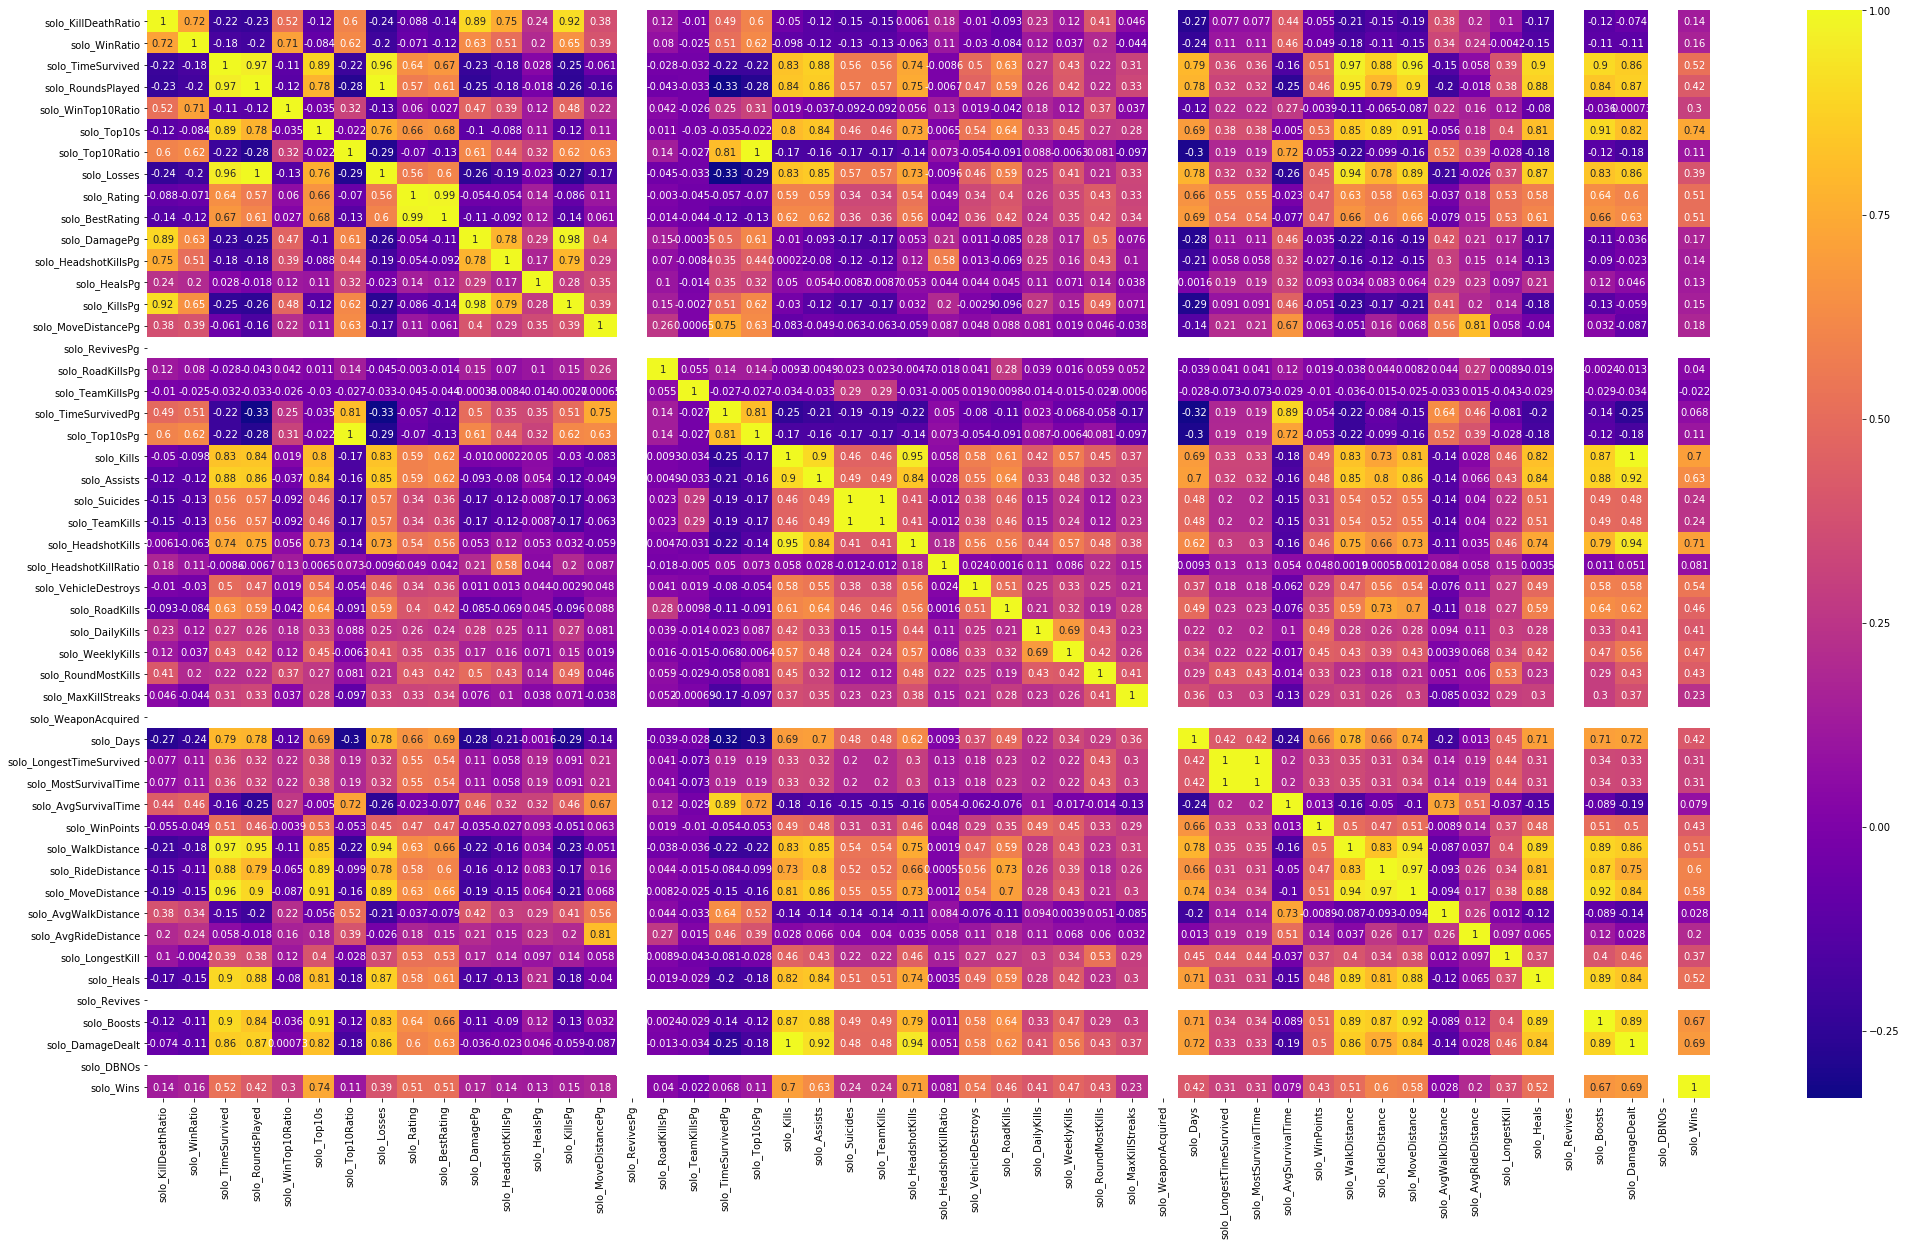

In [5]:
fig(35, 20)
sns.heatmap(df_solo.corr(), annot=True, cmap='plasma')

Selecting features having correlation value more than 50%

In [6]:
df_solo = df_solo[['solo_TimeSurvived','solo_Rating','solo_Top10s','solo_Kills','solo_Assists','solo_VehicleDestroys','solo_WalkDistance','solo_RideDistance','solo_MoveDistance','solo_Heals','solo_Boosts','solo_DamageDealt', 'solo_Wins']]

In [7]:
df_solo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 14872 to 1779
Data columns (total 13 columns):
solo_TimeSurvived       20000 non-null float64
solo_Rating             20000 non-null float64
solo_Top10s             20000 non-null int64
solo_Kills              20000 non-null int64
solo_Assists            20000 non-null int64
solo_VehicleDestroys    20000 non-null int64
solo_WalkDistance       20000 non-null float64
solo_RideDistance       20000 non-null float64
solo_MoveDistance       20000 non-null float64
solo_Heals              20000 non-null int64
solo_Boosts             20000 non-null int64
solo_DamageDealt        20000 non-null float64
solo_Wins               20000 non-null int64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


Modeling 

In [8]:
X = df_solo.drop(['solo_Wins'], 1)
y = df_solo['solo_Wins']

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)

In [10]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
accuracy_score(mlp.predict(test_x), test_y)

0.35

In [11]:
clf = MLPRegressor()
clf.fit(train_x, train_y)
explained_variance_score(mlp.predict(test_x), test_y)

-3.2608695652173925

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 20)
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
accuracy_score(mlp.predict(test_x), test_y)

0.45

In [14]:
mlp = MLPRegressor()
mlp.fit(train_x, train_y)
explained_variance_score(mlp.predict(test_x), test_y)

0.5167158660136575

Best Accuracy is 9.4%
Increasing threshold correlation value to 60% might help

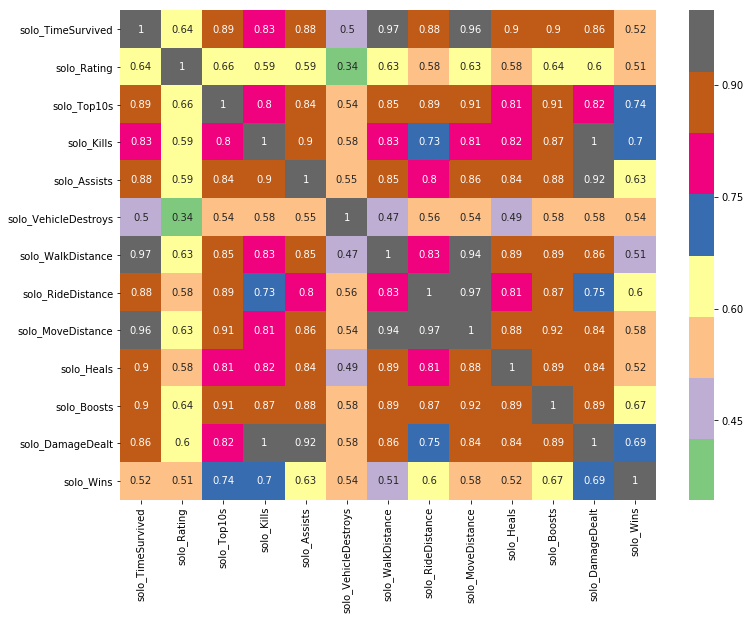

In [15]:
fig(12, 9)
sns.heatmap(df_solo.corr(), annot=True, cmap='Accent')

Selecting features having correlation more than 60%

In [16]:
df_solo = df_solo.drop(['solo_TimeSurvived','solo_Rating','solo_MoveDistance', 'solo_VehicleDestroys', 'solo_WalkDistance', 'solo_Heals' ], 1)
X = df_solo.drop(['solo_Wins'], 1)
y = df_solo['solo_Wins']

In [17]:
df_solo.head(2)

,solo_Top10s,solo_Kills,solo_Assists,solo_RideDistance,solo_Boosts,solo_DamageDealt,solo_Wins
14872,13,66,4,157053.30,130,8102.57,4
79168,7,54,3,76171.17,66,6953.10,1


Plotting pairplot  

<Figure size 7200x720 with 0 Axes>

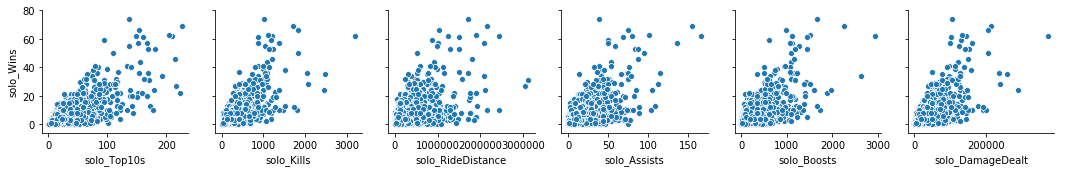

In [18]:
fig(100, 10)
sns.pairplot(data = df_solo, 
             x_vars=['solo_Top10s','solo_Kills','solo_RideDistance','solo_Assists','solo_Boosts','solo_DamageDealt'],
             y_vars= ['solo_Wins'])

Modeling and predicting 

In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)

In [20]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
accuracy_score(mlp.predict(test_x), test_y)

0.4

In [21]:
clf = MLPRegressor()
clf.fit(train_x, train_y)
explained_variance_score(mlp.predict(test_x), test_y)

-16.88888888888889

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 20)
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
accuracy_score(mlp.predict(test_x), test_y)

0.6

In [24]:
mlp = MLPRegressor()
mlp.fit(train_x, train_y)
explained_variance_score(mlp.predict(test_x), test_y)

0.8446816194132519

### Accuracy using MLPRegressor : 84%